#### Load Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/coin_Ethereum.csv")

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [5]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


In [6]:
df.isnull()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2155,False,False,False,False,False,False,False,False,False,False
2156,False,False,False,False,False,False,False,False,False,False
2157,False,False,False,False,False,False,False,False,False,False
2158,False,False,False,False,False,False,False,False,False,False


### Handle Date Column

In [7]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [8]:
df = pd.read_csv("Dataset/coin_Ethereum.csv")

In [9]:
print(df.columns)


Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')


In [10]:
df['Name'].value_counts()

Name
Ethereum    2160
Name: count, dtype: int64

In [11]:
df['Symbol'].value_counts()

Symbol
ETH    2160
Name: count, dtype: int64

In [12]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [13]:
df.index = pd.to_datetime(df.Date)

In [14]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,,
2015-08-08 23:59:59,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09 23:59:59,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10 23:59:59,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11 23:59:59,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12 23:59:59,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


### Removing unwanted columns like name because it is same , marketcap , symbol

In [15]:
df.drop(['Date' , 'Name' , 'Symbol' , 'Volume' , 'Marketcap' , 'SNo'],axis=1,inplace=True)

In [16]:
df.head()

,High,Low,Open,Close
Date,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440


In [17]:
def create_features(df):
    df['dayofweek'] = df.index.day_of_week
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    return df

### calling the function create features

In [18]:
df = create_features(df)

In [19]:
df.head()

,High,Low,Open,Close,dayofweek,month,dayofyear
Date,,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,5,8,220
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,6,8,221
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0,8,222
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1,8,223
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2,8,224


In [20]:
import seaborn as sns

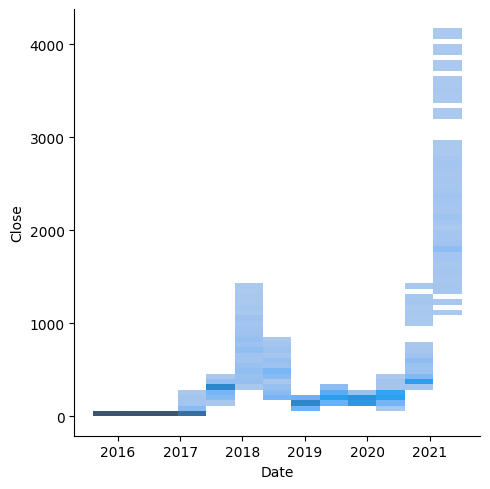

In [21]:
sns.displot(data = df , x= df.index , y = 'Close')

<Axes: xlabel='Date'>

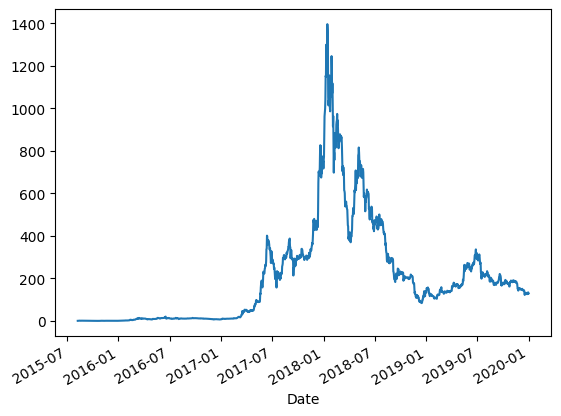

In [22]:
df['Close'].loc[(df.index < '01-01-2020')].plot()

<Axes: xlabel='Date'>

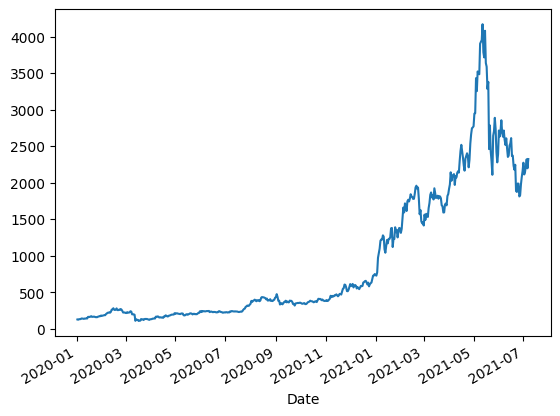

In [23]:
df['Close'].loc[(df.index > '01-01-2020')].plot()

In [24]:
df.head()

,High,Low,Open,Close,dayofweek,month,dayofyear
Date,,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,5,8,220
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,6,8,221
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,0,8,222
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1,8,223
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2,8,224


In [25]:
df.tail()

,High,Low,Open,Close,dayofweek,month,dayofyear
Date,,,,,,,
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,4,7,183
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,5,7,184
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,6,7,185
2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,0,7,186
2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,1,7,187


### Latest data

In [26]:
new_df = pd.read_csv('Ethereum Historical Data.csv')

In [27]:
new_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2024,"3,132.35","3,185.97","3,220.98","3,107.45",841.45K,-1.69%
1,11/10/2024,"3,186.05","3,126.25","3,247.49","3,076.40",925.65K,1.87%
2,11/09/2024,"3,127.69","2,961.62","3,153.38","2,954.56",560.62K,5.62%
3,11/08/2024,"2,961.34","2,894.20","2,981.51","2,887.19",598.52K,2.32%
4,11/07/2024,"2,894.13","2,721.85","2,914.81","2,700.01",784.35K,6.33%


In [28]:
new_df=new_df.iloc[::-1].reset_index(drop= True)

In [29]:
new_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/07/2021,"2,316.57","2,322.74","2,402.68","2,296.43",1.32M,-0.26%
1,07/08/2021,"2,120.22","2,316.21","2,322.47","2,095.92",1.82M,-8.48%
2,07/09/2021,"2,145.89","2,120.05","2,185.62","2,066.09",1.42M,1.21%
3,07/10/2021,"2,111.12","2,146.15","2,191.30","2,078.43",929.32K,-1.62%
4,07/11/2021,"2,139.35","2,110.90","2,173.34","2,081.62",724.84K,1.34%


In [30]:
new_df.index = pd.to_datetime(new_df['Date'])


In [31]:
new_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2021-07-07,07/07/2021,"2,316.57","2,322.74","2,402.68","2,296.43",1.32M,-0.26%
2021-07-08,07/08/2021,"2,120.22","2,316.21","2,322.47","2,095.92",1.82M,-8.48%
2021-07-09,07/09/2021,"2,145.89","2,120.05","2,185.62","2,066.09",1.42M,1.21%
2021-07-10,07/10/2021,"2,111.12","2,146.15","2,191.30","2,078.43",929.32K,-1.62%
2021-07-11,07/11/2021,"2,139.35","2,110.90","2,173.34","2,081.62",724.84K,1.34%


In [32]:
new_df.rename(columns = {'Price' : 'Close'}, inplace = True)

In [33]:
new_df.head()

,Date,Close,Open,High,Low,Vol.,Change %
Date,,,,,,,
2021-07-07,07/07/2021,"2,316.57","2,322.74","2,402.68","2,296.43",1.32M,-0.26%
2021-07-08,07/08/2021,"2,120.22","2,316.21","2,322.47","2,095.92",1.82M,-8.48%
2021-07-09,07/09/2021,"2,145.89","2,120.05","2,185.62","2,066.09",1.42M,1.21%
2021-07-10,07/10/2021,"2,111.12","2,146.15","2,191.30","2,078.43",929.32K,-1.62%
2021-07-11,07/11/2021,"2,139.35","2,110.90","2,173.34","2,081.62",724.84K,1.34%


In [34]:
new_df.drop(['Date' , 'Vol.' , 'Change %'],axis=1,inplace = True)

In [35]:

new_df.head()

,Close,Open,High,Low
Date,,,,
2021-07-07,"2,316.57","2,322.74","2,402.68","2,296.43"
2021-07-08,"2,120.22","2,316.21","2,322.47","2,095.92"
2021-07-09,"2,145.89","2,120.05","2,185.62","2,066.09"
2021-07-10,"2,111.12","2,146.15","2,191.30","2,078.43"
2021-07-11,"2,139.35","2,110.90","2,173.34","2,081.62"


In [36]:
import pandas as pd

# Load the CSV file
##file_path = '/mnt/data/Ethereum Historical Data.csv'
#new_df = pd.read_csv(file_path)

# Convert specified columns to float64 after removing commas
columns_to_convert = ['Low', 'High', 'Open', 'Close']
new_df[columns_to_convert] = new_df[columns_to_convert].replace(',', '', regex=True).astype('float64')

# Verify the changes
print(new_df.dtypes)


Close    float64
Open     float64
High     float64
Low      float64
dtype: object


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1224 entries, 2021-07-07 to 2024-11-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1224 non-null   float64
 1   Open    1224 non-null   float64
 2   High    1224 non-null   float64
 3   Low     1224 non-null   float64
dtypes: float64(4)
memory usage: 47.8 KB


In [38]:
new_df.head()

,Close,Open,High,Low
Date,,,,
2021-07-07,2316.57,2322.74,2402.68,2296.43
2021-07-08,2120.22,2316.21,2322.47,2095.92
2021-07-09,2145.89,2120.05,2185.62,2066.09
2021-07-10,2111.12,2146.15,2191.30,2078.43
2021-07-11,2139.35,2110.90,2173.34,2081.62


In [39]:
#print(new_df['High'].isnull().sum())  # Count null values
#print(new_df['High'][new_df['High'].isnull()])  # Inspect rows with null values
#print(new_df['High'].dtype)
#new_df['High'] = pd.to_numeric(new_df['High'], errors='coerce')
#new_df['High'] = new_df['High'].fillna(new_df['High'].mean())  # Replace with mean


In [40]:
new_df.isnull().sum()

Close    0
Open     0
High     0
Low      0
dtype: int64

In [41]:
new_df = create_features(new_df)

In [42]:
new_df.head()

,Close,Open,High,Low,dayofweek,month,dayofyear
Date,,,,,,,
2021-07-07,2316.57,2322.74,2402.68,2296.43,2,7,188
2021-07-08,2120.22,2316.21,2322.47,2095.92,3,7,189
2021-07-09,2145.89,2120.05,2185.62,2066.09,4,7,190
2021-07-10,2111.12,2146.15,2191.30,2078.43,5,7,191
2021-07-11,2139.35,2110.90,2173.34,2081.62,6,7,192


Model Training 


In [43]:
features = ['High' , 'Low' , 'Open', 'dayofweek' , 'month' , 'dayofyear']
target = 'Close'

In [44]:
x_train =df[features]
y_train = df[target]

x_test = new_df[features]
y_test = new_df[target]

In [45]:
x_train

,High,Low,Open,dayofweek,month,dayofyear
Date,,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,5,8,220
2015-08-09 23:59:59,0.879810,0.629191,0.706136,6,8,221
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0,8,222
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1,8,223
2015-08-12 23:59:59,1.289940,0.883608,1.058750,2,8,224
...,...,...,...,...,...,...
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,4,7,183
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,5,7,184
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,6,7,185


In [46]:
import xgboost as xgb

In [47]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [48]:
xgbr = xgb.XGBRFRegressor()

In [49]:
xgbr.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [50]:
#Training Accuracy
xgbr.score(x_train , y_train)

0.9991235440874954

In [51]:
#testing Accuracy
xgbr.score(x_test , y_test)

0.95743288664356

In [52]:
predictions= xgbr.predict(x_test)

In [53]:
predictions


array([2372.9392, 2270.5823, 2138.543 , ..., 3273.59  , 3273.59  ,
       3275.2932], dtype=float32)

In [54]:
xgbr = xgb.XGBRegressor(colsample_bytree = 0.7,
                        learning_rate=0.01,
                        max_depth=3,
                        n_estimators=500,
                        objective='reg:squarederror')

In [55]:
xgbr.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
xgbr.score(x_test , y_test)

0.9634301625206114

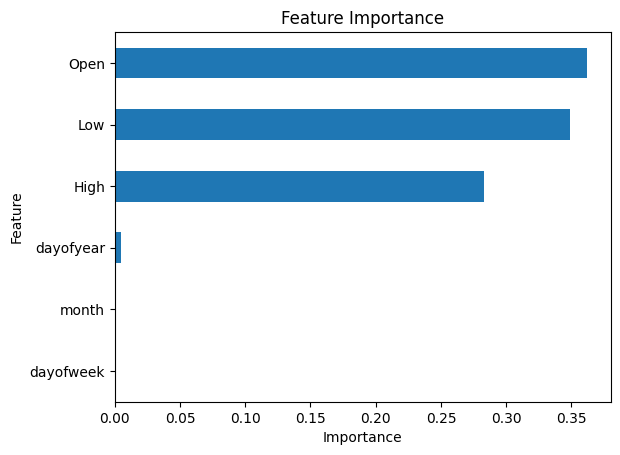

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train is the training data used for xgbr
# Extract feature names from the training dataset
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f"Feature_{i}" for i in range(x_train.shape[1])]

# Create a DataFrame for feature importances
fi = pd.DataFrame({'Feature': feature_names, 'Importance': xgbr.feature_importances_})

# Sort by importance
fi = fi.sort_values(by='Importance', ascending=True)

# Plot the feature importances
fi.plot(kind='barh', x='Feature', y='Importance', title='Feature Importance', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:

# Combine the two DataFrames
extended_df = pd.concat([df, new_df], ignore_index=True)

# Display the result
extended_df


,High,Low,Open,Close,dayofweek,month,dayofyear
0,2.798810,0.714725,2.793760,0.753325,5,8,220
1,0.879810,0.629191,0.706136,0.701897,6,8,221
2,0.729854,0.636546,0.713989,0.708448,0,8,222
3,1.131410,0.663235,0.708087,1.067860,1,8,223
4,1.289940,0.883608,1.058750,1.217440,2,8,224
...,...,...,...,...,...,...,...
3379,2914.810000,2700.010000,2721.850000,2894.130000,3,11,312
3380,2981.510000,2887.190000,2894.200000,2961.340000,4,11,313
3381,3153.380000,2954.560000,2961.620000,3127.690000,5,11,314
3382,3247.490000,3076.400000,3126.250000,3186.050000,6,11,315


In [59]:
new_df['predictions'] = xgbr.predict(x_test)
extended_df = extended_df.merge(new_df[['predictions']], how='left', left_index=True, right_index=True)


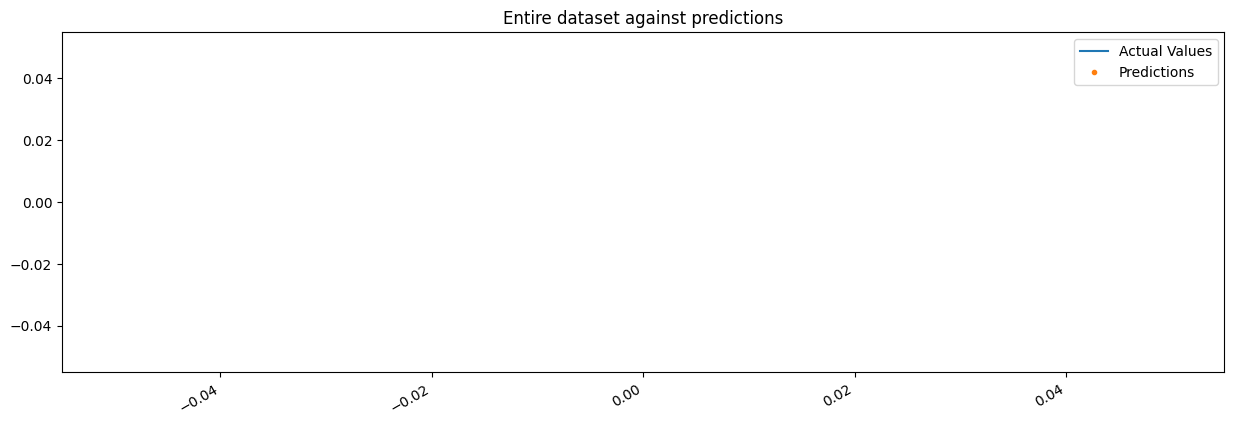

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is datetime
extended_df.index = pd.to_datetime(extended_df.index)

# Check if 'predictions' column exists and handle potential issues
if 'predictions' not in extended_df.columns:
    print("Error: 'predictions' column not found in extended_df.")
else:
    # Filter and plot
    ax = extended_df['Close'].loc[extended_df.index > '2021-01-01'].plot(figsize=(15, 5), label='Actual Values')
    extended_df['predictions'].loc[extended_df.index > '2021-01-01'].plot(ax=ax, style='.', label='Predictions')
    plt.legend()
    ax.set_title('Entire dataset against predictions')
    plt.show()


In [61]:
# Ensure the index is datetime
extended_df.index = pd.to_datetime(extended_df.index)

# Check the structure of the data
print("Dataset Info:")
print(extended_df.info())

# Check the first few rows of the dataset
print("\nHead of the dataset:")
print(extended_df.head())

# Check the filtered data
filtered_df = extended_df.loc[extended_df.index > '2021-01-01']
print("\nFiltered Data Info (Dates > 2021-01-01):")
print(filtered_df.info())

print("\nFiltered Data Head:")
print(filtered_df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3384 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000003383
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         3384 non-null   float64
 1   Low          3384 non-null   float64
 2   Open         3384 non-null   float64
 3   Close        3384 non-null   float64
 4   dayofweek    3384 non-null   int32  
 5   month        3384 non-null   int32  
 6   dayofyear    3384 non-null   int32  
 7   predictions  0 non-null      float32
dtypes: float32(1), float64(4), int32(3)
memory usage: 185.1 KB
None

Head of the dataset:
                                   High       Low      Open     Close  \
1970-01-01 00:00:00.000000000  2.798810  0.714725  2.793760  0.753325   
1970-01-01 00:00:00.000000001  0.879810  0.629191  0.706136  0.701897   
1970-01-01 00:00:00.000000002  0.729854  0.636546  0.713989  0.708448   
1970-01-01 00:00:00.000000003  

In [62]:
import matplotlib.pyplot as plt

# Ensure the 'predictions' column exists
if 'predictions' not in extended_df.columns:
    print("Error: 'predictions' column not found in extended_df.")
else:
    # Filter and plot
    filtered_df = extended_df.loc[extended_df.index > '2021-01-01']
    
    if filtered_df.empty:
        print("No data available for the specified date range.")
    else:
        ax = filtered_df['Close'].plot(figsize=(15, 5), label='Actual Values')
        filtered_df['predictions'].plot(ax=ax, style='.', label='Predictions')
        plt.legend()
        ax.set_title('Entire dataset against predictions')
        plt.show()


No data available for the specified date range.
